# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [4]:
import flatiron_stats as fs
import scipy.stats as stats

In [ ]:
## Make a smaller dataframe with relevant information

In [5]:
# Locate Relevant Data in Dataframe
education = 'FormalEducation' ## relevant feature column 
masters = "Master's degree" ## relevant feature (categorical var)
bachelors = "Bachelor's degree" ## relevant feature (categorical var)
adjcomp = 'AdjustedCompensation'## relevant feature column 

In [6]:
(~df[education].isnull()) ## allows subsetting of data with values 

0         True
1         True
2         True
3         True
4         True
         ...  
26389     True
26390     True
26391    False
26392     True
26393     True
Name: FormalEducation, Length: 26394, dtype: bool

In [7]:
(~df[adjcomp].isnull()) ## allows subsetting of data with values 

0        False
1        False
2        False
3         True
4        False
         ...  
26389    False
26390    False
26391    False
26392    False
26393    False
Name: AdjustedCompensation, Length: 26394, dtype: bool

In [14]:
wage_edu_df = df[(~df[adjcomp].isnull()) & ~df[education].isnull()] # for entries with values
wage_edu_df = wage_edu_df.loc[:, [education, adjcomp]]
wage_edu_df

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.000
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
14,Master's degree,36634.400
...,...,...
26185,Bachelor's degree,50000.000
26195,Bachelor's degree,100449.384
26203,Doctoral degree,200000.000
26255,Master's degree,89686.950


In [53]:
wage_edu_df[education].value_counts()

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

In [30]:
masters_wage_edu_df = wage_edu_df[wage_edu_df[education] == masters]
bachelors_wage_edu_df =  wage_edu_df[wage_edu_df[education] == bachelors]
display(masters_wage_edu_df)
display(bachelors_wage_edu_df)

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.000
14,Master's degree,36634.400
27,Master's degree,53352.000
31,Master's degree,35419.104
37,Master's degree,80000.000
...,...,...
26148,Master's degree,54670.000
26159,Master's degree,1.000
26180,Master's degree,65770.430
26255,Master's degree,89686.950


,FormalEducation,AdjustedCompensation
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
21,Bachelor's degree,20000.000
25,Bachelor's degree,10858.848
...,...,...
26031,Bachelor's degree,39050.000
26072,Bachelor's degree,31878.000
26101,Bachelor's degree,3336.000
26185,Bachelor's degree,50000.000


In [31]:
masters_wage_df = wage_edu_df[wage_edu_df[education] == masters][adjcomp]
bachelors_wage_df =  wage_edu_df[wage_edu_df[education] == bachelors][adjcomp]
display(masters_wage_df)
display(bachelors_wage_df)

3        250000.000
14        36634.400
27        53352.000
31        35419.104
37        80000.000
            ...    
26148     54670.000
26159         1.000
26180     65770.430
26255     89686.950
26378     10000.000
Name: AdjustedCompensation, Length: 1990, dtype: float64

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64

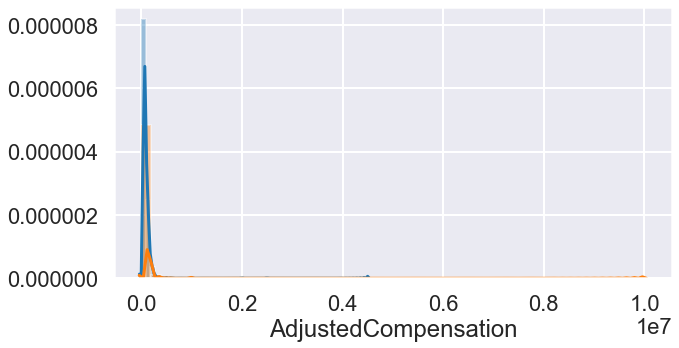

In [48]:
plt.figure(figsize=(10,5))
sns.set_context("poster")
sns.distplot(masters_wage_df)
sns.distplot(bachelors_wage_df)

In [ ]:
## Super hard to read, but below is the info for this plot.

In [62]:
print('Comparison of {} for {} and {}'.format(adjcomp, masters, bachelors))
print("Median Values: \tMaster's: {} \tBachelor's: {}".format(round(masters_wage_df.median(),2), round(bachelors_wage_df.median(),2)))
print("Mean Values: \tMaster's: {} \tBachelor's: {}".format(round(masters_wage_df.mean(),2), round(bachelors_wage_df.mean(),2)))
print("Sample sizes: \tMaster's: {} \tBachelor's: {}".format(len(masters_wage_df), len(bachelors_wage_df)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(masters_wage_df, bachelors_wage_df))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	Master's: 53812.17 	Bachelor's: 38399.4
Mean Values: 	Master's: 69139.9 	Bachelor's: 64887.1
Sample sizes: 	Master's: 1990 	Bachelor's: 1107
Welch's t-test p-value: 0.33077639451272445


In [65]:
#Investigate Percentiles, This is one way to check for outliers
for q in np.linspace(.8, 1, num=21):
    masters_q =  round(masters_wage_df.quantile(q=q), 2)
    bachelors_q =  round(bachelors_wage_df.quantile(q=q), 2)
    print('{}th percentile:\tmasters: {}\tbachelors: {}'.format(round(q,2), masters_q, bachelors_q))

0.8th percentile:	masters: 103000.0	bachelors: 93233.13
0.81th percentile:	masters: 107009.0	bachelors: 95572.83
0.82th percentile:	masters: 110000.0	bachelors: 99276.38
0.83th percentile:	masters: 111503.83	bachelors: 100000.0
0.84th percentile:	masters: 115240.4	bachelors: 103040.0
0.85th percentile:	masters: 119582.6	bachelors: 105935.04
0.86th percentile:	masters: 120000.0	bachelors: 110000.0
0.87th percentile:	masters: 124719.88	bachelors: 112000.0
0.88th percentile:	masters: 129421.46	bachelors: 115000.0
0.89th percentile:	masters: 130000.0	bachelors: 120000.0
0.9th percentile:	masters: 135000.0	bachelors: 120346.5
0.91th percentile:	masters: 140000.0	bachelors: 126460.0
0.92th percentile:	masters: 149640.0	bachelors: 132615.4
0.93th percentile:	masters: 150000.0	bachelors: 140000.0
0.94th percentile:	masters: 160000.0	bachelors: 143408.8
0.95th percentile:	masters: 166778.6	bachelors: 150000.0
0.96th percentile:	masters: 180000.0	bachelors: 179849.74
0.97th percentile:	masters: 

In [71]:
## Up to the 99th percentile, the spread between each looks pretty even.
## We likely have some outliers, severely impacting our distribution.
print('Repeated Test with Outliers Removed:')
print("Master's: {}\tBachelor's: {}".format(masters, bachelors))
outlier_threshold = 500000 ## A threshold of our choosing 
masters_wage_no_outliers = wage_edu_df[(wage_edu_df[education]==masters) & (wage_edu_df[adjcomp]<=outlier_threshold)][adjcomp]
bachelors_wage_no_outliers = wage_edu_df[(wage_edu_df[education]==bachelors) & (wage_edu_df[adjcomp]<=outlier_threshold)][adjcomp]
print("Median Values: \tMaster's: {} \tBachelor's: {}".format(round(masters_wage_no_outliers.median(),2), round(bachelors_wage_edu_df.median(),2)))
print("Mean Values: \tMaster's: {} \tBachelor's: {}".format(round(masters_wage_no_outliers.mean(),2), round(bachelors_wage_no_outliers.mean(),2)))
print("Sample sizes: \tMaster's: {} \tBachelor's: {}".format(len(masters_wage_no_outliers), len(bachelors_wage_no_outliers)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(masters_wage_no_outliers, bachelors_wage_no_outliers))

Repeated Test with Outliers Removed:
Master's: Master's degree	Bachelor's: Bachelor's degree
Median Values: 	Master's: 53539.72 	Bachelor's: AdjustedCompensation    38399.4
dtype: float64
Mean Values: 	Master's: 63976.63 	Bachelor's: 53744.35
Sample sizes: 	Master's: 1985 	Bachelor's: 1103
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


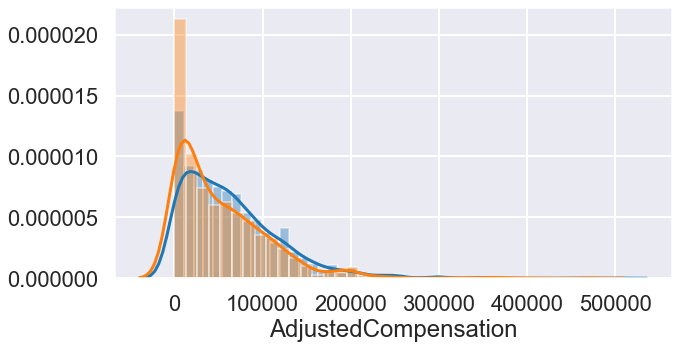

In [79]:
plt.figure(figsize=(10,5))
sns.set_context("poster")
sns.distplot(masters_wage_no_outliers) ## blue
sns.distplot(bachelors_wage_no_outliers) ## orange


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [54]:
doctoral = "Doctoral degree" ## relevant feature (categorical var)

In [55]:
doctoral_wage_df = wage_edu_df[wage_edu_df[education] == doctoral][adjcomp]
doctoral_wage_df.head()

22    100000.000
32    172144.440
34    133000.000
61     15000.000
72     43049.736
Name: AdjustedCompensation, dtype: float64

In [70]:
# Check for outliers
for q in np.linspace(.8, 1, num=21):
    doctoral_q =  round(doctoral_wage_df.quantile(q=q), 2)
    print('{}th percentile:\tdoctoral: {}'.format(round(q,2), doctoral_q))

0.8th percentile:	doctoral: 135000.0
0.81th percentile:	doctoral: 140000.0
0.82th percentile:	doctoral: 140000.0
0.83th percentile:	doctoral: 146796.17
0.84th percentile:	doctoral: 150000.0
0.85th percentile:	doctoral: 150000.0
0.86th percentile:	doctoral: 155000.0
0.87th percentile:	doctoral: 160000.0
0.88th percentile:	doctoral: 160000.0
0.89th percentile:	doctoral: 166480.0
0.9th percentile:	doctoral: 172057.78
0.91th percentile:	doctoral: 175000.0
0.92th percentile:	doctoral: 181555.2
0.93th percentile:	doctoral: 191900.0
0.94th percentile:	doctoral: 200000.0
0.95th percentile:	doctoral: 200000.0
0.96th percentile:	doctoral: 220999.61
0.97th percentile:	doctoral: 240879.14
0.98th percentile:	doctoral: 277349.78
0.99th percentile:	doctoral: 336800.0
1.0th percentile:	doctoral: 28297400000.0


In [80]:
## remove outliers and run test
print('Test with Outliers Removed:')
print("Doctoral: {}\tBachelor's: {}".format(doctoral, bachelors))
outlier_threshold = 500000 ## A threshold of our choosing 
doctoral_wage_no_outliers = wage_edu_df[(wage_edu_df[education]==doctoral) & (wage_edu_df[adjcomp]<=outlier_threshold)][adjcomp]
bachelors_wage_no_outliers = wage_edu_df[(wage_edu_df[education]==bachelors) & (wage_edu_df[adjcomp]<=outlier_threshold)][adjcomp]
print("Median Values: \tDoctoral: {} \tBachelor's: {}".format(round(doctoral_wage_no_outliers.median(),2), round(bachelors_wage_edu_df.median(),2)))
print("Mean Values: \tMaster's: {} \tBachelor's: {}".format(round(doctoral_wage_no_outliers.mean(),2), round(bachelors_wage_no_outliers.mean(),2)))
print("Sample sizes: \tMaster's: {} \tBachelor's: {}".format(len(doctoral_wage_no_outliers), len(bachelors_wage_no_outliers)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(doctoral_wage_no_outliers, bachelors_wage_no_outliers))

Test with Outliers Removed:
Doctoral: Doctoral degree	Bachelor's: Bachelor's degree
Median Values: 	Doctoral: 73152.77 	Bachelor's: AdjustedCompensation    38399.4
dtype: float64
Mean Values: 	Master's: 86194.98 	Bachelor's: 53744.35
Sample sizes: 	Master's: 964 	Bachelor's: 1103
Welch's t-test p-value with outliers removed: 0.0


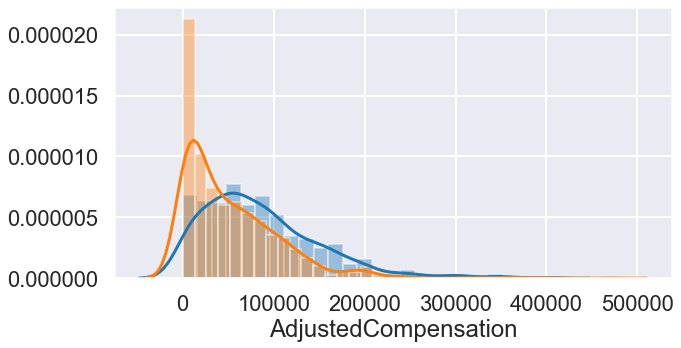

In [81]:
plt.figure(figsize=(10,5))
sns.set_context("poster")
sns.distplot(doctoral_wage_no_outliers) ## blue
sns.distplot(bachelors_wage_no_outliers) ## orange

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [82]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(adjcomp, education)
lm = ols(formula, df).fit() ## uses original dataframe
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [83]:
## Same test with outliers removed (same threshold )
temp = df[df[adjcomp]<=outlier_threshold]
formula = '{} ~ C({})'.format(adjcomp, education)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!